# Tutorial 1 - Generation of impedance data
Now that is clear how to define the input information, we can generate some
data using the `generate_data.py` module.\
First of all, let's add the parent folder path to import the functions that
we need.

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent)) 

## Single element case
### Resistor
If we take a single element, for example `R1`, that has an associated parameter
$R = 100\,\Omega$, 

In [2]:
circuit_string = '(R1)'
parameters = ([100])

where the constant elements conditions are not relevant in the generation
module (thus they are all set to 1 from now on), we can create a `Circuit`
object that contains all these information.

In [3]:
from generate_data import generate_circuit_data


generation_circuit = generate_circuit_data(circuit_string, parameters)

From the circuit settings we can get an impedance function, correlated with
its non-constant parameters. A method of the `Circuit` class lets us to
create another object, this time an `AnalysisCircuit` object, that contains
the results of this analysis.

In [4]:
analyzed_circuit = generation_circuit.generate_analyzed_circuit()
impedance_function = analyzed_circuit.impedance

Now we can set the number of frequency points in a specific range: for example
let's take 100 points between $0.1\,Hz$ and $100\,kHz$

In [5]:
import numpy as np


log_frequency = np.linspace(-1, 5, 100)
frequency = 10.**log_frequency

To simulate some random noise we need to extract all the circuit's parameters
first, then the pure signal is generated. The simulated noise is added to it
later

In [6]:
from generate_data import simulate_noise


final_parameters = analyzed_circuit.list_parameters()
impedance_signal = impedance_function(final_parameters, frequency)

impedance = simulate_noise(impedance_signal)

Now, if we plot the impedance modulus and phase, we should get a constant
impedance with modulus $Z = 100\,\Omega$ and zero phase.

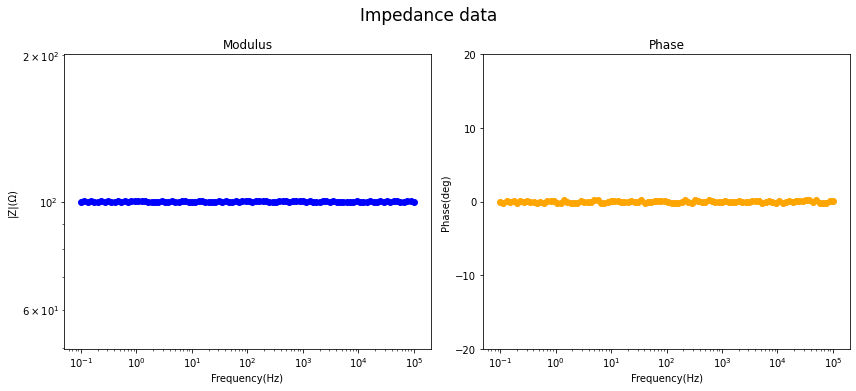

In [7]:
from plot_and_save import plot_data

plot_data(frequency, impedance)

### Capacitor
Another simple example is the capacitor case. We can take a capacitor `C1`
with a capacitance $C = 1\,\mu F$. Let's keep the same frequencies

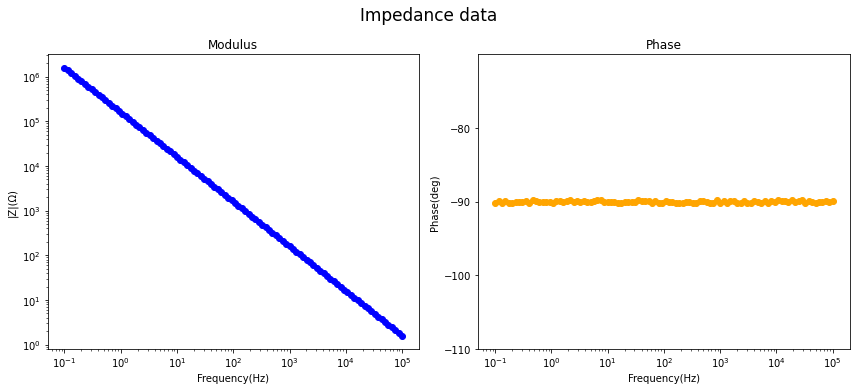

In [8]:
circuit_string = '(C1)'
parameters = ([1e-6])

capacitative_circuit = generate_circuit_data(circuit_string, parameters)
analyzed_capacitative_circuit = capacitative_circuit.generate_analyzed_circuit()
impedance_function = analyzed_capacitative_circuit.impedance

final_parameters = analyzed_capacitative_circuit.list_parameters()
impedance_signal = impedance_function(final_parameters, frequency)
impedance = simulate_noise(impedance_signal)

plot_data(frequency, impedance)

## Two-element circuit
### RC series 
One of the most basic circuit that however manages to describe real-life data
is the RC series circuit. As explained before, the "in series" junction is
done delimitatting the elements with round brakets.

In [9]:
circuit_string = '(R1C2)'

This string corresponds to the circuit
<p align="center">
    <img src="Images_tutorial/RC_series.png" alt="image" width="500"/>
</p>

Now, if we set $R = 1\,k\Omega$ and $C = 1\,\mu F$

In [10]:
parameters = ([1e3, 1e-6])

The resultat plot is

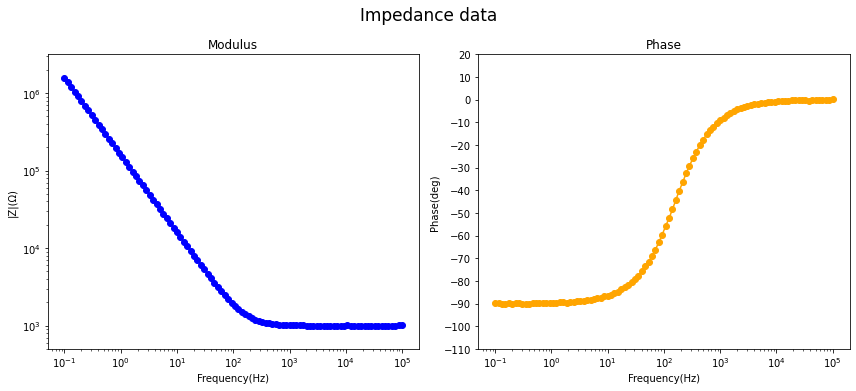

In [11]:
circuit_rc = generate_circuit_data(circuit_string, parameters)
analyzed_circuit_rc = circuit_rc.generate_analyzed_circuit()
impedance_function = analyzed_circuit_rc.impedance

final_parameters = analyzed_circuit_rc.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
impedance = simulate_noise(impedance_signal)

plot_data(frequency, impedance)

### RC parallel 
The counterpart of the last circuit is the RC in parallel (below, a scheme).
Now the string must be with the square brackets. If we use the same values
<p align="center">
    <img src="Images_tutorial/RC_parallel.png" alt="image" width="500"/>
</p>

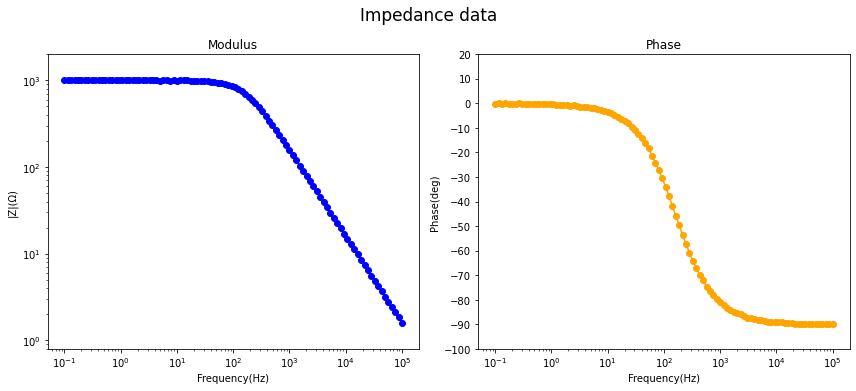

In [12]:
circuit_string = '[R1C2]'
parameters = ([1e3, 1e-6])

circuit_rc_p = generate_circuit_data(circuit_string, parameters)
analyzed_circuit_rc_p = circuit_rc_p.generate_analyzed_circuit()
impedance_function = analyzed_circuit_rc_p.impedance

final_parameters = analyzed_circuit_rc_p.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
impedance = simulate_noise(impedance_signal)

plot_data(frequency, impedance)

### Many elements circuit
To make more complex circuits the only thing to do is write the correct string
and add more parameters. If there are multiple pairs of brackets (which are
not in conflict with each other), called cells, the algorithm will work like
this:
- the elements inside the inner pair of brackets, , (i.e. the most nested
cell) will be analyzed first 
- an equivalent impedance element $Zi$ with its impedance function and
parameters will replace the analyzed elements (and the related brackets)
- the new most nested cell will be analyzed as explained before, and so on
and so fourth until there is only one element $Zi$. This is actually how the
program ran behind the scenes so far.\
Thus, if we take the circuit string `(R1C2[R3Q4])` (that correspond to the
circuit below), during the analysis the string will be transformed as\
`(R1C2[R3Q4])` -> `(R1C2Z1)` -> `Z2`\
At this point, since no bracket is detected, the program knows that the
analysis is done.\
Note: the number after the $Z$ corresponds only to the number of analyzed
cells at the moment the $Zi$ element is created.
<p align="center">
    <img src="Images_tutorial/(R1C2[R3Q4]).png" alt="image" width="460"/>
</p>

In [13]:
circuit_string = '(R1C2[R3Q4])'

For the value of this circuit let's set for the resistors $R1 = 3\,k\Omega$
and $R3 = 10\,k\Omega$ and for the capacitors $C2 = 2\,\mu F$. Regarding the
constant phase elements, we could settle for a $Q = 0.2 \cdot 10^{-6}$ and
an ideality factor $n = 0.82$.

In [14]:
parameters = ([3000, 2e-6, 10000, ([0.2e-6, 0.82])])

Then, the generated impedance will be

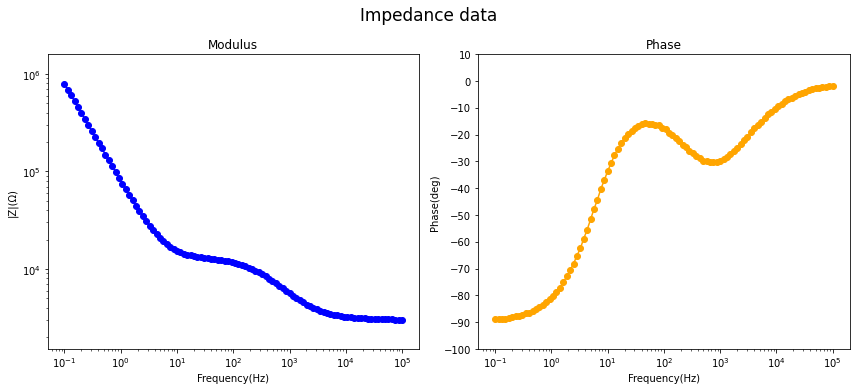

In [15]:
complex_circuit = generate_circuit_data(circuit_string, parameters)
analyzed_complex_circuit = complex_circuit.generate_analyzed_circuit()
impedance_function = analyzed_complex_circuit.impedance

final_parameters = analyzed_complex_circuit.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
impedance = simulate_noise(impedance_signal)

plot_data(frequency, impedance)

## Saving the data
After all of this data generation, we may want to save the generated data.
The displayed method is to write the frequency array and the complex
impedance array inside of a `.txt` file, where the two columns are separated  by a
`;`. It is done with

In [16]:
from generate_data import save_data

fine_name = 'Tutorial_generated_data.txt'
number_of_columns = 2
save_data(fine_name, number_of_columns, frequency, impedance)

However, the modulus and phase vs frequency format is also avaible, and can be
chosen setting as number of columns `3` in the `save_data` function.